# **Data Analysis Python Project - Blinkit Analysis**


## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Import the Raw data

In [4]:
df=pd.read_csv('/content/BlinkIT Grocery Data.csv')

## Sample data

In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


## Shape of the data

In [8]:
df.shape

(8523, 12)

## Column Informartion

In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## Datatypes

In [11]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


## Data cleaning

In [16]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [24]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## Kpi Requirement

In [45]:
#Total Sales
total_sales=df['Sales'].sum()
print(f'Total Sales : ${total_sales:,.0f}')

#Average Sales
average_sales=df['Sales'].mean()
print(f'Average Sales : ${average_sales:,.0f}')

#No of items Sold
no_of_items_sold=df['Sales'].count()
print(f'No fo items Sold :{no_of_items_sold:,.0f}')

#Average Rating
average_rating=df['Rating'].mean()
print(f'Average Rating :{average_rating:,.1f}')


Total Sales : $1,201,681
Average Sales : $141
No fo items Sold :8,523
Average Rating :4.0


## Charts Requirement

## Sales by Fat content using chart

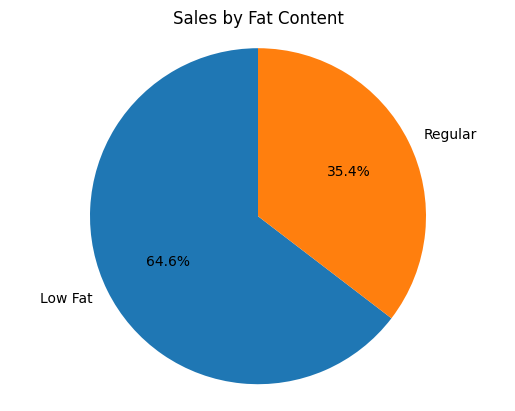

In [53]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat , labels = sales_by_fat.index,
                                autopct='%.1f%%',
                                startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

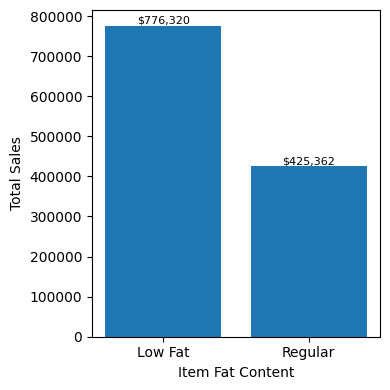

In [82]:
sales_by_item_fat = df.groupby('Item Fat Content')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(4,4))
fatbars = plt.bar(sales_by_item_fat.index,sales_by_item_fat.values)

plt.xticks(rotation=0)
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')

for bar in fatbars:
  plt.text(
           bar.get_x()+bar.get_width()/2,
           bar.get_height(),
           f'${bar.get_height():,.0f}',
           ha='center',
           va='bottom',
           fontsize=8
           )
plt.tight_layout()

## Total sales by item type


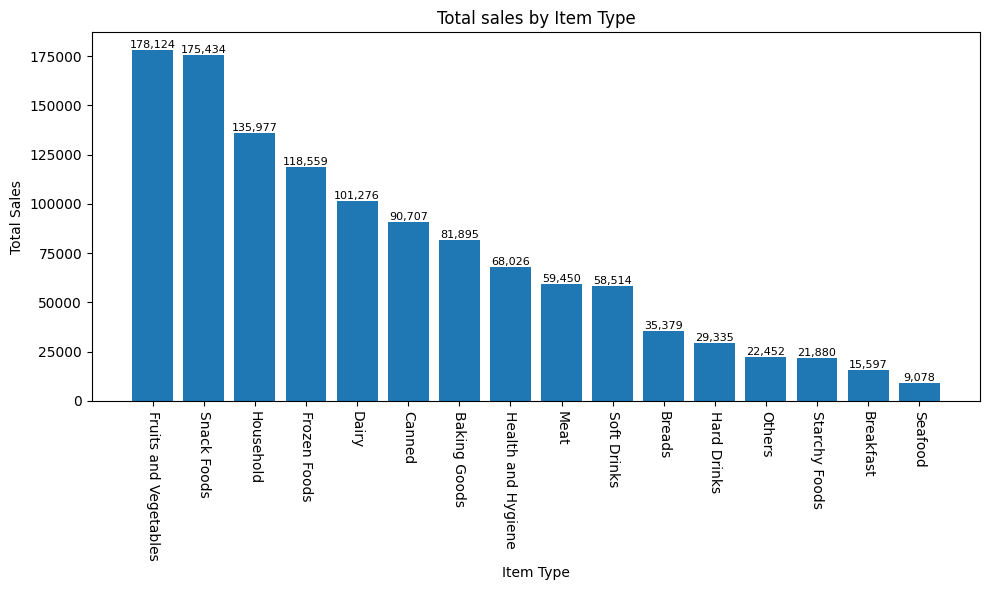

In [68]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title("Total sales by Item Type")

for bar in bars:
  plt.text(
      bar.get_x() + bar.get_width() /2, bar.get_height(),
      f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8 )

plt.tight_layout()
plt.show()

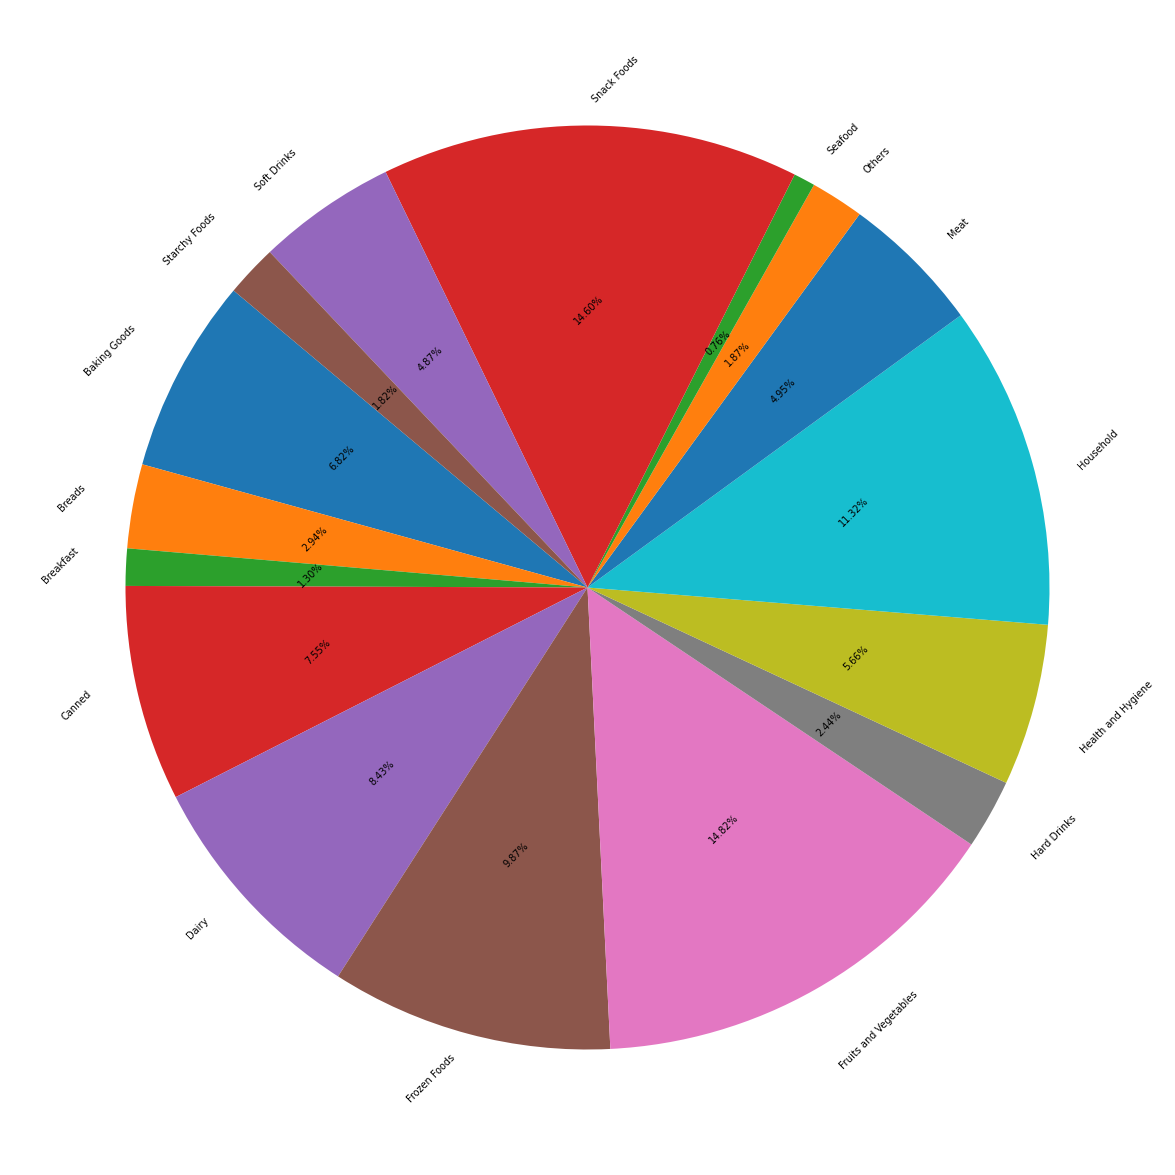

In [97]:
item_type_sales = df.groupby('Item Type')['Sales'].sum()
# .sort_values(ascending=False)
plt.figure(figsize=(20,15))
plt.pie(item_type_sales,
        labels=item_type_sales.index,
        autopct='%.2f%%',
        startangle=140
        ,textprops={'rotation':45,'fontsize':7}
        )
plt.xticks(rotaiton=-90)
plt.show()

## Fat content by outlet for total sales

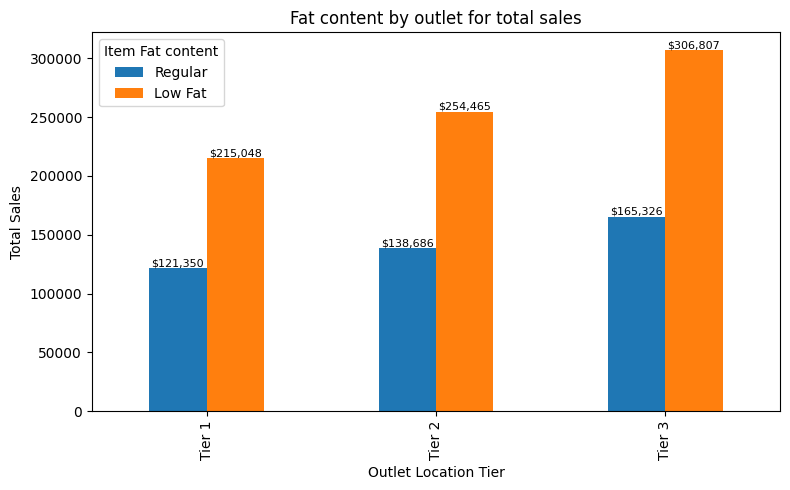

In [111]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

chart = grouped.plot(kind='bar' , figsize=(8, 5), title = 'Fat content by outlet for total sales')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat content')

for container in chart.containers:
  for bar in container:
    height = bar.get_height()
    chart.text(
               bar.get_x() + bar.get_width()/2,
               bar.get_height(),
               f'${bar.get_height():,.0f}',
               ha='center',
               va='bottom',
               fontsize=8)

plt.tight_layout()
plt.show()

## Total sales by outlet establishment

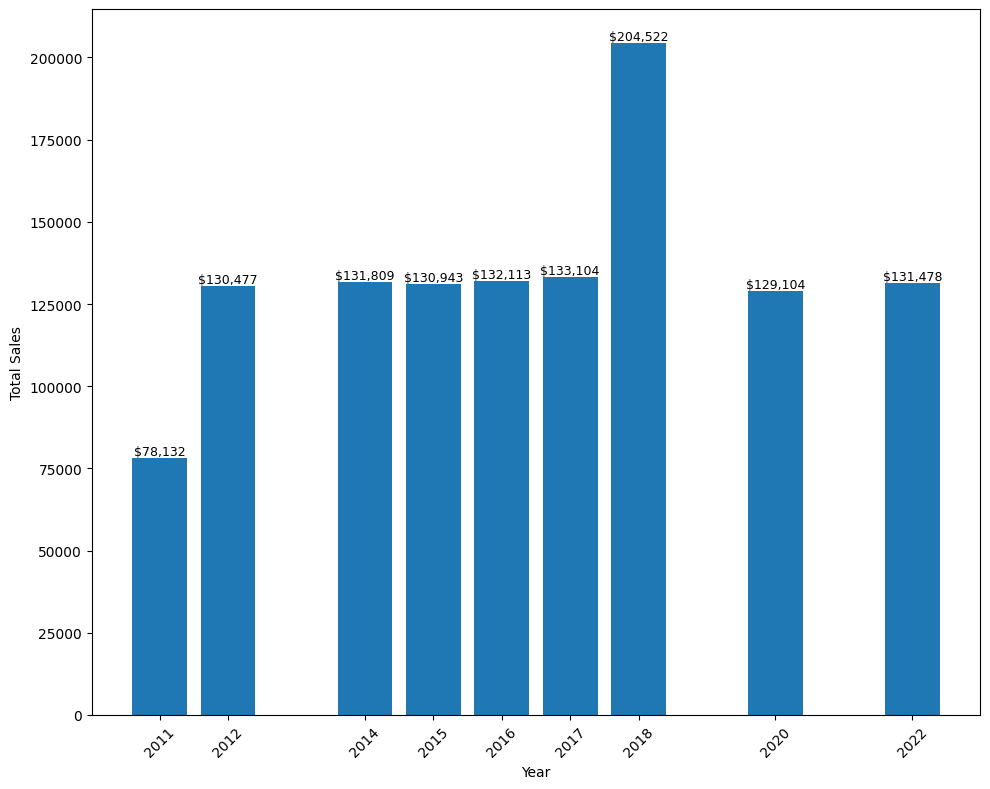

In [134]:
  sales_by_esta = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

  plt.figure(figsize=(10,8))
  bars = plt.bar(sales_by_esta.index,sales_by_esta.values)
  plt.xticks(ticks=sales_by_esta.index, labels=sales_by_esta.index, rotation=45)
  plt.xlabel('Year')
  plt.ylabel('Total Sales')
for bar in bars:
    plt.text(
          bar.get_x() + bar.get_width()/2,
          bar.get_height(),
          f'${bar.get_height():,.0f}',
          ha='center',
          va='bottom',
          fontsize=9

  )

  plt.tight_layout()
  plt.show()



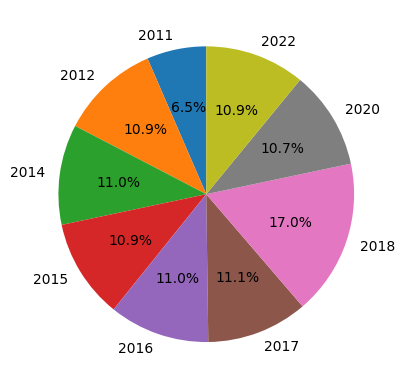

In [142]:
sales_by_etablish = df.groupby('Outlet Establishment Year')['Sales'].sum()

plt.pie(sales_by_etablish, labels=
                                  sales_by_etablish.index,autopct='%.1f%%',startangle=90)
plt.show()

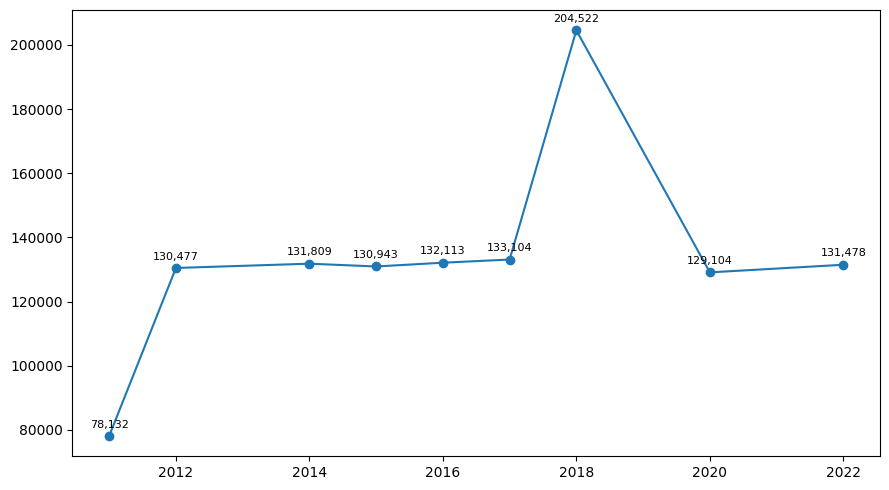

In [159]:
sales_by_outlet_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_outlet_year.index ,sales_by_outlet_year.values , marker='o',linestyle='-')

for x,y in zip(sales_by_outlet_year.index,sales_by_outlet_year.values):
  plt.text(x,y+2000,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

## Sales by outlet size

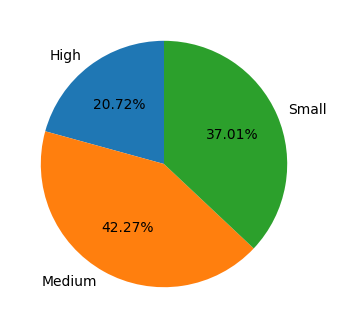

In [165]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(6,4))
plt.pie(sales_by_outlet_size,labels=sales_by_outlet_size.index,
                                    autopct='%.2f%%',
                                    startangle=90)
plt.show()

## Total sales by outlet location

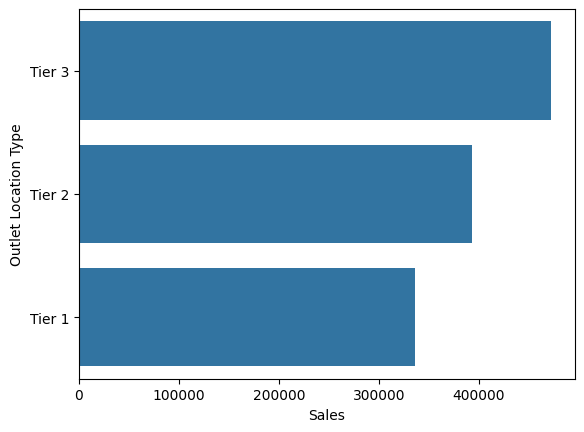

In [184]:
sale_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)

axis = sns.barplot(x='Sales',y='Outlet Location Type',data=sale_location)

plt.show()